In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyEMA

In [11]:
%matplotlib qt

In [4]:
freq, H1_main = np.load("./data/acc_data.npy")

In [5]:
#Impact , accelerometer
FRF = H1_main[:,1,:]

freq = freq
acc = pyEMA.lscf(frf=FRF, 
                 freq=freq, 
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

In [12]:
acc.get_poles()
acc.stab_chart(acc.all_poles, legend = False)

# Alternatively the frequencies can be defines as a list, e.g.:
#n_freq =  [176,476,932,1534,2258,3161,4180]
#acc.identification(n_freq)

To pick a pole press the MIDDLE mouse button.
To erase the last pick click the RIGHT mouse button.
1. Frequency: ~171 --> 176.04746186461352 Hz
2. Frequency: ~463 --> 476.466508678801 Hz
3. Frequency: ~938 --> 935.2418960660109 Hz
4. Frequency: ~938 --> 935.2418960660109 Hz
Deleting the last pick...
Deleting the last pick...
3. Frequency: ~938 --> 935.2418960660109 Hz
Deleting the last pick...
3. Frequency: ~938 --> 935.2418960660109 Hz
Deleting the last pick...
3. Frequency: ~924 --> 931.8713959751806 Hz
4. Frequency: ~1381 --> 1375.9740797666777 Hz
Deleting the last pick...
4. Frequency: ~1372 --> 1375.9740797666777 Hz
Deleting the last pick...
4. Frequency: ~1376 --> 1375.9740797666777 Hz
Deleting the last pick...
4. Frequency: ~1385 --> 1375.9740797666777 Hz
Deleting the last pick...
4. Frequency: ~1381 --> 1375.9740797666777 Hz
5. Frequency: ~1531 --> 1534.6222019534353 Hz
6. Frequency: ~2280 --> 2286.1719489348275 Hz
7. Frequency: ~3166 --> 3161.7539007392133 Hz
8. Frequency: ~41

The selected natural frequencies and corresponding damping factors:

In [13]:
for i, (f, xi) in enumerate(zip(acc.nat_freq, acc.nat_xi),start = 1):
    print("f%s = %4.1f Hz, xi = %4.5f" % (i,f,xi))

f1 = 176.0 Hz, xi = 0.00872
f2 = 476.5 Hz, xi = 0.00193
f3 = 931.9 Hz, xi = 0.00135
f4 = 1376.0 Hz, xi = 0.00227
f5 = 1534.6 Hz, xi = 0.00193
f6 = 2286.2 Hz, xi = 0.00281
f7 = 3161.8 Hz, xi = 0.00142
f8 = 4181.4 Hz, xi = 0.00144


Modal constants and residuals (last but one is the lower residual, last one is the upper residual):

In [30]:
acc.A[:,:3]

array([[ 1.60388276e+01  -49.6653311j ,  1.53847513e+02 -412.20732743j,
         5.44049637e+01 -154.05105505j],
       [-3.33744625e+01  +14.94055331j, -3.06674317e+02 +713.78012882j,
        -4.94501960e+02+1576.84705287j],
       [-2.22513248e+00  +28.97450653j, -2.33647970e+02 +452.18406756j,
         4.78132601e+02-1024.91755265j],
       [ 3.93030177e-01  +29.20136241j,  2.44845197e+02 -442.27340864j,
         5.12137917e+02-1033.10406562j],
       [ 1.98140415e+00   +5.27883791j,  3.58390806e+02 -637.65583894j,
        -6.91535271e+02+1364.9552478j ],
       [ 3.41301245e+00  -36.75725276j, -1.89432741e+02 +333.72108323j,
         1.00304437e+02 -182.28938445j]])

Real part of modal constants:

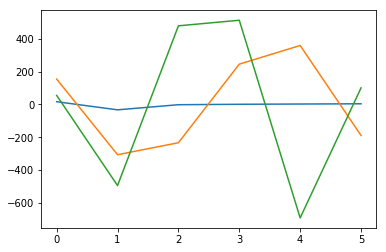

In [31]:
%matplotlib inline
plt.plot(np.real(acc.A[:,:3]))

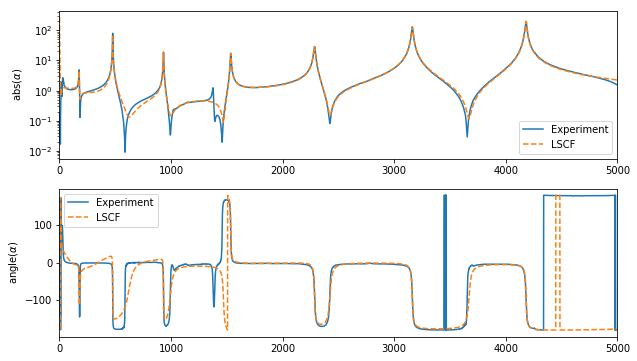

In [9]:
select_loc = 0

acc.modal_const(frf_loc=select_loc)
acc.reconstruct()

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(acc.freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(acc.rekf, np.abs(acc.rek),'--', label='LSCF')
plt.xlim(0,acc.rekf[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(acc.freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(acc.rekf, np.angle(acc.rek,deg = 1),'--',label='LSCF')
plt.xlim(0,acc.rekf[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best')